In [1]:
print("Hello World")

Hello World


In [1]:
!which python

/Users/peterclements/.pyenv/versions/3.13.5/bin/python


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd  # import pandas

# Attempt to fetch the webpage content again
url = "https://ffxiv.consolegameswiki.com/wiki/Triple_Triad_Cards"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Extract the table rowsgit remote -v
table = soup.find("table", {"class": "sortable"})
rows = table.find_all("tr")

# Parse the table data
data = []
for row in rows[1:]:  # skip the header
    cols = row.find_all("td")
    if len(cols) == 10:
        card = cols[0].text.strip()
        icon = cols[1].find('img')['src'] if cols[1].find('img') else ''
        rarity = cols[2].text.strip()
        card_type = cols[3].text.strip()
        up = cols[4].text.strip()
        right = cols[5].text.strip()
        down = cols[6].text.strip()
        left = cols[7].text.strip()
        npc_reward = cols[8].text.strip()
        acquired_by = cols[9].text.strip()
        data.append([card, icon, rarity, card_type, up, right, down, left, npc_reward, acquired_by])

# Define the column names
columns = ['Card', 'Icon', 'Rarity', 'Card Type', 'Up', 'Right', 'Down', 'Left', 'NPC Reward', 'Acquired By']

# Create the DataFrame
df_full = pd.DataFrame(data, columns=columns)

print(df_full)

Empty DataFrame
Columns: [Card, Icon, Rarity, Card Type, Up, Right, Down, Left, NPC Reward, Acquired By]
Index: []


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://ffxiv.consolegameswiki.com/wiki/Triple_Triad_Cards"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", {"class": "sortable"})
rows = table.find_all("tr")

data = []
for row in rows[1:]:  # skip the header
    cols = row.find_all("td")
    if len(cols) == 11:
        record_number = cols[0].text.strip()
        card = cols[1].find('a').text.strip()
        icon = cols[2].find('img')['src'] if cols[2].find('img') else ''
        rarity = cols[3].contents[0].strip()
        card_type = cols[4].text.strip()
        up = cols[5].text.strip()
        right = cols[6].text.strip()
        down = cols[7].text.strip()
        left = cols[8].text.strip()
        npc_reward = cols[9].text.strip()
        acquired_by = cols[10].find('a').text.strip() if cols[10].find('a') else ''
        data.append([record_number, card, icon, rarity, card_type, up, right, down, left, npc_reward, acquired_by])

columns = ['#', 'Card', 'Icon', 'Rarity', 'Card Type', 'Up', 'Right', 'Down', 'Left', 'NPC Reward', 'Acquired By']
df_full = pd.DataFrame(data, columns=columns)
df_full['Rarity'] = df_full['Rarity'].apply(lambda x: x.count('★'))

print(df_full)

       #                      Card  \
0    308                   2B Card   
1    286                   2P Card   
2    311  4th-make Cuchulainn Card   
3    310   4th-make Shemhazai Card   
4    268                   9S Card   
..   ...                       ...   
439  384              Zeromus Card   
440   *9        Zidane Tribal Card   
441  329              Zodiark Card   
442  404            Zoraal Ja Card   
443  166               Zurvan Card   

                                                  Icon  Rarity Card Type Up  \
0             /mediawiki/images/e/eb/2b_card_icon1.png       5      None  6   
1             /mediawiki/images/4/4f/2p_card_icon1.png       5      None  4   
2    /mediawiki/images/2/2d/4th-make_cuchulainn_car...       3      None  8   
3    /mediawiki/images/f/f1/4th-make_shemhazai_card...       3      None  1   
4             /mediawiki/images/9/93/9s_card_icon1.png       5      None  4   
..                                                 ...     ...       

In [5]:
import numpy as np
from scipy.stats import norm
from math import log, sqrt, exp

# Black-Scholes Formula Components
def d1(S, K, T, r, sigma):
    return (log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))

def theta_call(S, K, T, r, sigma):
    D1 = d1(S, K, T, r, sigma)
    D2 = D1 - sigma * sqrt(T)
    term1 = - (S * norm.pdf(D1) * sigma) / (2 * sqrt(T))
    term2 = r * K * exp(-r * T) * norm.cdf(D2)
    return (term1 - term2) / 365  # Convert to daily theta

# Parameters
S = 1221    # Current stock price
K = 1245    # Strike price
T = 2 / 365  # Time to expiration in years
r = 0.01    # Risk-free rate (annual)
sigma = 0.30  # Volatility (annual)

# Calculate Theta
theta = theta_call(S, K, T, r, sigma)
print(f"The estimated daily theta for the call option is: {theta:.4f}")

The estimated daily theta for the call option is: -1.8700


In [8]:
import numpy as np
from scipy.stats import norm
from math import log, sqrt, exp

def d1(S, K, T, r, sigma):
    return (log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))

def d2(S, K, T, r, sigma):
    return d1(S, K, T, r, sigma) - sigma * sqrt(T)

def delta(S, K, T, r, sigma):
    D1 = d1(S, K, T, r, sigma)
    return norm.cdf(D1)

def charm(S, K, T, r, sigma):
    D1 = d1(S, K, T, r, sigma)
    D2 = d2(S, K, T, r, sigma)
    term1 = -norm.pdf(D1) * ((2 * r * T - D2 * sigma * sqrt(T)) / (2 * T * sigma * sqrt(T)))
    return term1 / 365  # Convert to daily charm

# Input parameters
S = 1221    # Current stock price
K = 1245    # Strike price
T = 2 / 365  # Time to expiration in years
r = 0.01    # Risk-free rate (annual)
sigma = 0.30  # Volatility (annual)

# Calculate Charm
option_charm = charm(S, K, T, r, sigma)
print(f"The estimated daily charm for the call option is: {option_charm:.4f}")

The estimated daily charm for the call option is: -0.0612


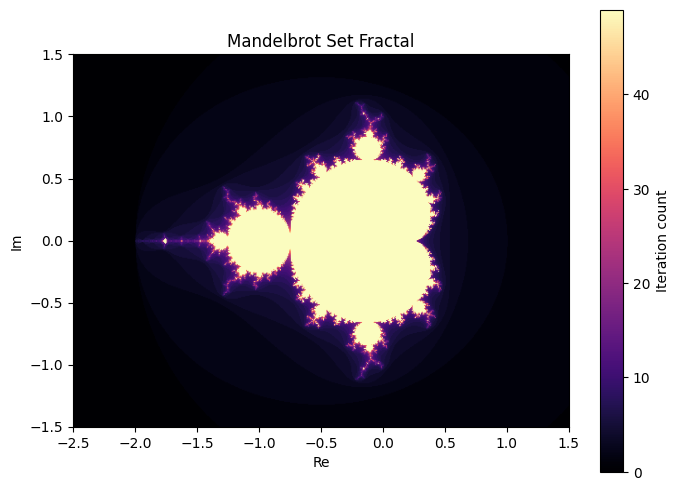

In [3]:
# Mandelbrot Set Visualization
import numpy as np
import matplotlib.pyplot as plt

# Set image size and plot window
width, height = 600, 400
xmin, xmax = -2.5, 1.5
ymin, ymax = -1.5, 1.5

# Create a grid of complex numbers
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
C = X + 1j * Y
Z = np.zeros_like(C)
mandelbrot = np.zeros(C.shape, dtype=int)

max_iter = 50
for i in range(max_iter):
    mask = np.abs(Z) <= 2
    Z[mask] = Z[mask] ** 2 + C[mask]
    mandelbrot[mask] = i

plt.figure(figsize=(8, 6))
plt.imshow(mandelbrot, extent=[xmin, xmax, ymin, ymax], cmap='magma')
plt.colorbar(label='Iteration count')
plt.title('Mandelbrot Set Fractal')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()